#  **FUZZY CLUSTERING FRAMEWORK**

# Setup


**Setup Variables**

In [ ]:
# ToDo:
#   use external .py to setup tests that includes: test Name, params and metrics
#   fully integrate mlflow

In [ ]:
init_Dags = False
log_run = True
external_test = "dirichlet"
# (number of data n, number of clusters k, dimension of cluster d, m parameter m, number of iteration MAX_ITERS)
external_params = (150, 5, 4, 1.7, 50)
_run_name = "Dirlechet Distro 3rd Run"

!cd

**Pre-requisites**

In [ ]:
# just check for mlflow is installed

try:
  import mlflow
except ImportError as e:
  !pip install -q mlflow
  
# DVC installation requires reset of the environment loosing all global variables
try:
  import dvc
except ImportError as e:
  !pip install -q dvc
  import os
  os.kill(os.getpid(), 9)



***Imports***

In [ ]:


import os
import mlflow
import pandas as pd # reading all required header files
import numpy as np
import random
import operator
import math
import matplotlib.pyplot as plt 
from scipy.stats import multivariate_normal 


os.environ['MLFLOW_TRACKING_USERNAME'] = "3834205774.elcesar"
os.environ['MLFLOW_TRACKING_PASSWORD'] = "384efa9bb1f88706a1971c603e4a136a7dc20e31"





First Setup? Need take diferent desicions if the proyect exist

**Create Proyect Dir and init Git**

In [ ]:

if init_Dags:
  !mkdir fcm
  %cd fcm
  !mkdir -p ./scr
  !touch ./scr/__init__.py
  !wget -P /content/fcm/scr https://raw.githubusercontent.com/cesarweb/ISPC-AnaDat-2020/main/CDIA/Proyecto/FCMtests.py

  !git config --global user.email "3834205774.elcesar@gmail.com"
  !git config --global user.name "3834205774.elcesar"
  !touch README.md

  !git init
  !git add README.md
  !git add ./scr/FCMtests.py
  !git add ./scr/__init__.py
  !git commit -m "first commit"
  !git remote add origin  https://384efa9bb1f88706a1971c603e4a136a7dc20e31@dagshub.com/3834205774.elcesar/FCM.git
  !git push -u origin master

**Init DVC**

In [ ]:
if init_Dags:
  !dvc init
  !mkdir data
  %cd data
  !mkdir raw

  !dvc remote add origin https://dagshub.com/3834205774.elcesar/FCM.dvc
  !dvc remote modify origin --local auth basic
  !dvc remote modify origin --local user 3834205774.elcesar
  !dvc remote modify origin --local password 384efa9bb1f88706a1971c603e4a136a7dc20e31

# Make sure you are using DVC 1.10 or greater for the next command

**Init Mflow Integration**

In [ ]:
#mlflow.set_tracking_uri(r"https://dagshub.com/3834205774.elcesar/FCM.mlflow")
#mlflow.end_run()

In [ ]:
mlflow.set_tracking_uri(r"https://dagshub.com/3834205774.elcesar/FCM.mlflow")
if log_run : mlflow.start_run(run_name = _run_name)


**Proyect config**

In [ ]:
if init_Dags:

  import pandas as pd # reading all required header files
  from sklearn.datasets import load_iris

  iris = load_iris(as_frame=True)
  df = pd.DataFrame(iris.data)
  ldf = pd.DataFrame(iris.target)
  ldf["target"] =ldf["target"].astype(str)
  ldf['target'] = ldf['target'].map({'0':'Iris-setosa',
                             '1':'Iris-versicolor',
                             '2':'Iris-virginica'},
                             na_action=None)

  # ldf.head()
  # df.head() # Check Data Correctly Downloaded

  %cd raw
  ldf.to_csv("./liris.csv")  
  df.to_csv("./iris.csv")  
  !dvc add ./liris.csv
  !dvc add ./iris.csv

  %cd ../
  %cd ../

  !git add .
  !git commit -m "first data file"
  !git push -u origin master

  !dvc push -r origin

**Load repository**

In [ ]:
if not init_Dags:
  !git config --global user.email "3834205774.elcesar@gmail.com"
  !git config --global user.name "3834205774.elcesar"

  !git clone https://dagshub.com/3834205774.elcesar/FCM.git /content/fcm
  %cd fcm
  !git checkout master
  !dvc pull -r origin

fatal: destination path '/content/fcm' already exists and is not an empty directory.
[Errno 2] No such file or directory: 'fcm'
/content/fcm/scr
Already on 'master'
Your branch is up to date with 'origin/master'.
Everything is up to date.


# Engine Runing... Let's Go

# **Load Dataset**

In [ ]:
df = pd.read_csv('/content/fcm/data/raw/iris.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

dfl = pd.read_csv('/content/fcm/data/raw/liris.csv')
class_labels = dfl['target'].tolist()

df.head() # Check Loaded Data


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# **Defining parameters**

Data = { x<sub>1</sub>, x<sub>2</sub>, ... , x<sub>n</sub> }
<br>
Cluster = { C<sub>1</sub>, C<sub>2</sub>, ... , C<sub>k</sub> }

n = number of data<br>
k = number of clusters<br>
d = dimension of data<br>
m = fuzzy parameter


In [ ]:
import sys
sys.path.insert(0,'/content/fcm/scr')
%cd /content/fcm/scr
tests_loaded = False
try:
  import FCMtests
  tests_loaded = True
except:
  pass

if (tests_loaded and (external_test !="")):
  test = FCMtests.get_test(external_test, external_params, df)
  # dir(FCMtests.dirlichet(external_params, df))
  n = test.n
  k = test.k
  d = test.d
  m = test.m
  MAX_ITERS = test.MAX_ITERS
else: 
  #number of data
  n = len(df)
  #number of clusters (3)
  k = 2
  #dimension of cluster (4)
  d = 3
  # m parameter (2)
  m = 2
  #number of iterations
  MAX_ITERS = 13

print (n,k,d,m,MAX_ITERS)


/content/fcm/scr
150 5 4 1.7 50


Run Setup DagsHub

In [ ]:
if log_run:
   mlflow.log_param("Datos", n)
   mlflow.log_param("Clusters", k)
   mlflow.log_param("Dim Cluster", d)
   mlflow.log_param("Fuzzy", m)
   mlflow.log_param("Iteraciones", MAX_ITERS)

# **Visualizing Data**

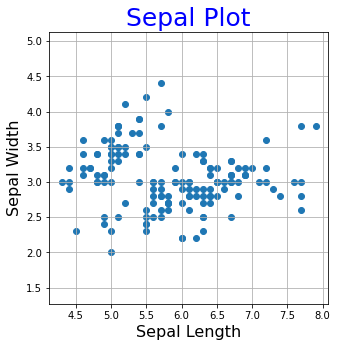

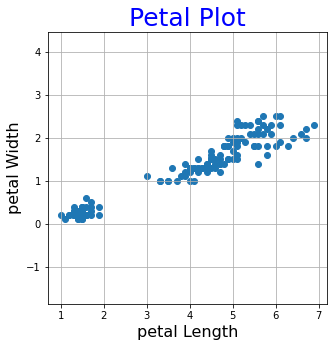

In [ ]:
plt.figure(0,figsize=(5,5))                #scatter plot of sepal length vs sepal width                              
plt.scatter(list(df.iloc[:,0]), list(df.iloc[:,1]), marker='o')       
plt.axis('equal')                                                                 
plt.xlabel('Sepal Length', fontsize=16)                                                 
plt.ylabel('Sepal Width', fontsize=16)                                                 
plt.title('Sepal Plot', fontsize=25,color='b')                                            
plt.grid()   
plt.savefig("sepal_length_vs_sepal_width.png")
if log_run:
  mlflow.log_artifact("sepal_length_vs_sepal_width.png")                                                      
plt.show()

plt.figure(1,figsize=(5,5))                #scatter plot of sepal length vs sepal width                              
plt.scatter(list(df.iloc[:,2]), list(df.iloc[:,3]), marker='o')       
plt.axis('equal')                                                                 
plt.xlabel('petal Length', fontsize=16)                                                 
plt.ylabel('petal Width', fontsize=16)                                                 
plt.title('Petal Plot', fontsize=25,color='b')                                            
plt.grid()  
plt.savefig("petal_length_vs_petal_width.png")
if log_run:
  mlflow.log_artifact("petal_length_vs_petal_width.png")                                                             
plt.show()



# **Accuracy**

In [ ]:
def accuracy(cluster_labels, class_labels, labels, df):
  return test.accuracy(cluster_labels, class_labels, labels, df)

# **Get Clusters**


In [ ]:
def getClusters(membership_mat, n): # getting the clusters
    cluster_labels = list()
    for i in range(n):
        max_val, idx = max((val, idx) for (idx, val) in enumerate(membership_mat[i]))
        cluster_labels.append(idx)
    return cluster_labels

# **Fuzzy C Means**

In [ ]:
def fuzzyCMeansClustering(n, k, m, df, MAX_ITER): #Second Iteration Multivariate Gaussian
    # Membership Matrix
    membership_mat = initializeMembershipMatrix(n, k)
    curr = 0
    acc=[]
    cent_temp = calculateClusterCenter(membership_mat, n, k, m, df)
    
    while curr < MAX_ITER:
        if(curr == 0):
            cluster_centers = cent_temp
            print("Cluster Centers:")
            print(np.array(cluster_centers))
        else:
            cluster_centers = calculateClusterCenter(membership_mat, n, k, m, df)
        membership_mat = updateMembershipValue(membership_mat, cluster_centers, n, k, m, df)
        cluster_labels = getClusters(membership_mat, n)

        acc.append(cluster_labels)
        curr += 1
    print("---------------------------")
    print("Partition matrix:")
    print(np.array(membership_mat))
    #return cluster_labels, cluster_centers
    return cluster_labels, cluster_centers, acc, membership_mat


# **Initializing Membership Matrix**

### <b>w<sub>ij</sub></b> Get value from TestCase.

In [ ]:
def initializeMembershipMatrix(n, k): # initializing the membership matrix
    return test.initializeMembershipMatrix(n, k)

# **Calculating Cluster Center**

### To calculate centroids for each cluster we apply the following formula:

## C<sub>j</sub> = $ \frac{\sum_{i=1}^{n} W_{ij}^m x_{i}}{\sum_{i=1}^{n} W_{ij}^m} $

### m(fuzzy-ness) ranges from 1 to $\infty$

In [ ]:
def calculateClusterCenter(membership_mat, n, k, m, df):
    return test.calculateClusterCenter(membership_mat, n, k, m, df)

# **Updating Membership Value**

### Calculate the fuzzy-pseudo partition with the above formula
## $$w_{ij} = \frac{(\frac{1}{dist(x_i, c_j)})^{\frac{1}{m-1}}}{\sum_{s=1}^{k}(\frac{1}{dist(x_i,c_s)})^{\frac{1}{m-1}}}w 
ij$$


### where $dist (x_i, c_j)$ is the Euclidean distance between $x_{i}$ and $c_{j}$ cluster center.

In [ ]:
def updateMembershipValue(membership_mat, cluster_centers, n, k, m, df): # Updating the membership value
   return test.updateMembershipValue(membership_mat, cluster_centers, n, k, m, df)

# **Running algorithm**

In [ ]:
membership_mat = initializeMembershipMatrix(n, k)

#cluster_centers = calculateClusterCenter(membership_mat)
calculateClusterCenter(membership_mat, n, k, m, df)

labels, centers, acc, final_weights= fuzzyCMeansClustering(n, k, m, df, MAX_ITERS)

a = accuracy(labels, class_labels, labels, df)


acc_lis = []
for i in range(0,len(acc)):
    val = accuracy(acc[i], class_labels, labels, df)
    acc_lis.append(val)


acc_lis = np.array(acc_lis) #calculating accuracy and std deviation 100 times

print("mean=",np.mean(acc_lis))
print("Std dev=",np.std(acc_lis))

print("Accuracy = " + str(round(a, 2)))
print("Cluster center vectors:") #final cluster centers
print(np.array(centers))


Cluster Centers:
[[5.81481481 2.9962963  3.69259259 1.15185185]
 [5.8483871  3.05806452 3.90967742 1.27096774]
 [6.052      3.032      4.164      1.376     ]
 [5.74473684 3.01842105 3.66315789 1.17894737]
 [5.8137931  3.1862069  3.43103448 1.04137931]]
---------------------------
Partition matrix:
[[9.00049376e-05 4.79352199e-05 2.72015856e-05 1.96181649e-04
  9.99638677e-01]
 [2.11207185e-03 1.10684807e-03 6.22179239e-04 5.00505737e-03
  9.91153843e-01]
 [1.53537981e-03 8.30310701e-04 4.71116257e-04 3.47269537e-03
  9.93690498e-01]
 [3.23337367e-03 1.70799621e-03 9.50157830e-04 7.74744956e-03
  9.86361023e-01]
 [1.90894531e-04 1.02755277e-04 5.83469089e-05 4.10822846e-04
  9.99237180e-01]
 [8.97147698e-03 4.68375346e-03 2.58921117e-03 1.86216530e-02
  9.65133905e-01]
 [1.58016846e-03 8.55584600e-04 4.78491334e-04 3.56908906e-03
  9.93516667e-01]
 [8.61299835e-06 4.51237152e-06 2.52561251e-06 1.96358071e-05
  9.99964713e-01]
 [9.63439285e-03 5.19627208e-03 2.92015258e-03 2.28503524e-02

In [ ]:
if (log_run):
    mlflow.log_metric("mean", np.mean(acc_lis))
    mlflow.log_metric("Std dev",np.std(acc_lis))
    mlflow.log_metric("Accuracy", str(round(a, 2)))
    #mlflow.log_metric("Cluster center vectors", str(repr(np.array(centers))))


# **Plot data for visualizing algorithm**

In [ ]:
def plotData(z,C):  
  plt.subplot(4,3,z+1)              #scatter plot of sepal length vs sepal width                              
  plt.scatter(list(df.iloc[:,2]), list(df.iloc[:,3]), marker='o')    
  for center in C:
    plt.scatter(center[2],center[3], marker='o',color='r')        
  plt.axis('equal')                                                                 
  plt.xlabel('Sepal Length', fontsize=16)                                                 
  plt.ylabel('Sepal Width', fontsize=16)                                                                                      
  plt.grid()                                                  

# **Visualizing Cluster final centers**

In [ ]:
df_sepal = df.iloc[:,0:2]
df_petal = df.iloc[:,2:5]

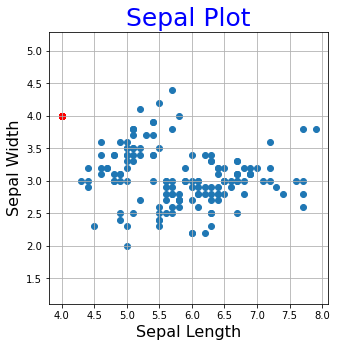

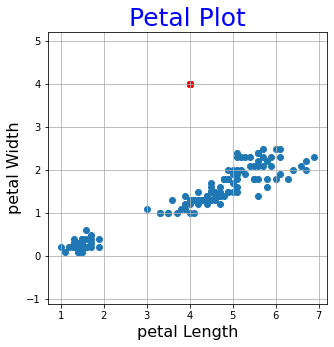

In [ ]:
plt.figure(0,figsize=(5,5))                #scatter plot of sepal length vs sepal width                              
plt.scatter(list(df_sepal.iloc[:,0]), list(df_sepal.iloc[:,1]), marker='o')       
plt.axis('equal')                                                                 
plt.xlabel('Sepal Length', fontsize=16)                                                 
plt.ylabel('Sepal Width', fontsize=16)                                                 
plt.title('Sepal Plot', fontsize=25,color='b')                                            
plt.grid() 
for center in acc:
  plt.scatter(center[0],center[1], marker='o',color='r')                                                                
plt.savefig("Final_centers_sepal_length_vs_sepal_width.png")
if log_run:
  mlflow.log_artifact("Final_centers_sepal_length_vs_sepal_width.png") 
plt.show()

plt.figure(1,figsize=(5,5))                #scatter plot of sepal length vs sepal width                              
plt.scatter(list(df_petal.iloc[:,0]), list(df_petal.iloc[:,1]), marker='o')       
plt.axis('equal')                                                                 
plt.xlabel('petal Length', fontsize=16)                                                 
plt.ylabel('petal Width', fontsize=16)                                                 
plt.title('Petal Plot', fontsize=25,color='b')                                            
plt.grid()                     
for center in acc:
  plt.scatter(center[2],center[3], marker='o',color='r')                                                       
plt.savefig("Final_centers_petal_length_vs_petal_width.png")
if log_run:
  mlflow.log_artifact("Final_centers_petal_length_vs_petal_width.png") 
plt.show()

**Calculating Accuracy**

In [ ]:
#  accuracy
def accuracy(self, cluster_labels, class_labels, labels, df):
  return test.Accuracy(cluster_labels, class_labels, test.n)

# **Visualizing clusters** 

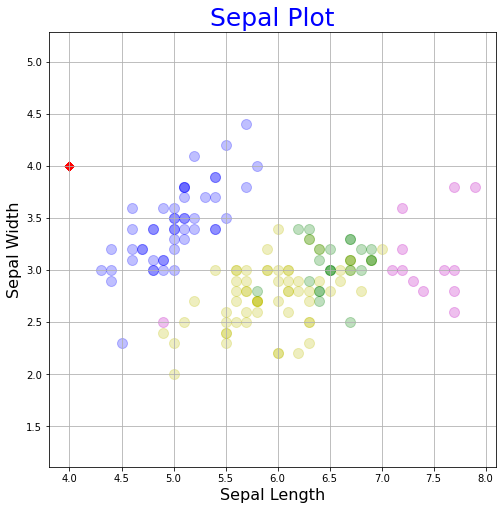

In [ ]:
X = np.zeros((n,1))
plt.figure(0,figsize=(8,8))                #scatter plot of sepal length vs sepal width                                     
plt.axis('equal')                                                                 
plt.xlabel('Sepal Length', fontsize=16)                                                 
plt.ylabel('Sepal Width', fontsize=16)                                                 
plt.title('Sepal Plot', fontsize=25,color='b')                                            
plt.grid() 
for center in acc:
  plt.scatter(center[0],center[1], marker='D',color='r')                                                                
clr = 'b'
for i in range(n):    
    cNumber = np.where(final_weights[i] == np.amax(final_weights[i]))
    if cNumber[0][0]==0:
      clr = 'y'
    elif cNumber[0][0]==1:
      clr = 'g'
    elif cNumber[0][0]==2:
      clr = 'm'
    plt.scatter(list(df_sepal.iloc[i:i+1,0]), list(df_sepal.iloc[i:i+1,1]), alpha=0.25,s=100,color=clr)
plt.savefig("Final_clusters_sepal_length_vs_sepal_width.png")
if log_run:
  mlflow.log_artifact("Final_clusters_sepal_length_vs_sepal_width.png") 
plt.show()

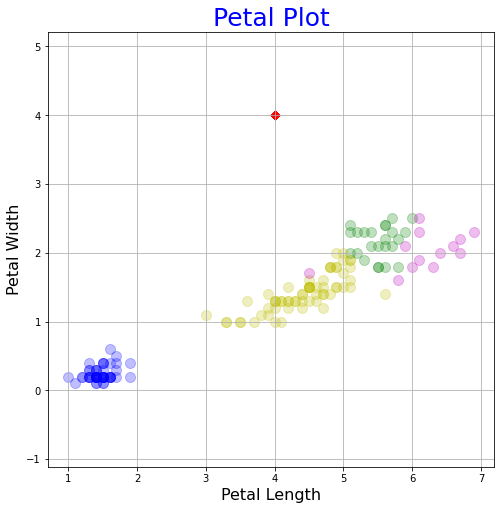

In [ ]:
X = np.zeros((n,1))
plt.figure(0,figsize=(8,8))                #scatter plot of sepal length vs sepal width                                     
plt.axis('equal')                                                                 
plt.xlabel('Petal Length', fontsize=16)                                                 
plt.ylabel('Petal Width', fontsize=16)                                                 
plt.title('Petal Plot', fontsize=25,color='b')                                            
plt.grid() 
for center in acc:
  plt.scatter(center[2],center[3], marker='D',color='r')                                                                
clr = 'b'
for i in range(n):    
    cNumber = np.where(final_weights[i] == np.amax(final_weights[i]))
    if cNumber[0][0]==0:
      clr = 'y'
    elif cNumber[0][0]==1:
      clr = 'g'
    elif cNumber[0][0]==2:
      clr = 'm'
    plt.scatter(list(df_petal.iloc[i:i+1,0]), list(df_petal.iloc[i:i+1,1]), alpha=0.25, s=100, color=clr)
plt.savefig("Final_clusters_petal_length_vs_petal_width.png")
if log_run:
  mlflow.log_artifact("Final_clusters_petal_length_vs_petal_width.png") 
plt.show()






In [ ]:
#if log_run:
#  uri = mlflow.get_artifact_uri()
#  nuri = os.path.join('/content/fcm/scr/'+ uri.replace('.',""))
#  nuri
#  os.chdir(nuri)
#  !git add .
#  !git commit -m "New Experiment - "

**Push the Files to the Remotes**

In [ ]:
#if log_run:
#   !git push https://384efa9bb1f88706a1971c603e4a136a7dc20e31@dagshub.com/3834205774.elcesar/FCM.git

Everything up-to-date


In [ ]:
if log_run:
  mlflow.end_run()

# Cleaning